In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd
import os
import sys
import warnings

In [3]:
RAVV="RAVDEES/audio_speech_actors_01-24/"

In [4]:
dir_list=os.listdir(RAVV)
dir_list

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

#### understanding the given dataset
this dataset is taken from kaggle. also termed as RAVDESS 
MODALITY(01=FULL-AV=video-only,03=AUDIO only)

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


the given ausdio represent 

 02-01-06-01-02-01-12.mp4
 
Video-only(02) 

Speech(01)

Fearful(06)

Normal intensity(01)

Statement dogs(02)

1st repetition(01)

12th actor- Female(as teh actor ID NUMBer is even)

In [5]:
dir_list.sort()
#dir_list

emotion=[]
gender=[]
path=[]
for i in dir_list:
    fname=os.listdir(RAVV+i)
    for f in fname:
        part=f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp=int(part[6])
        if temp%2==0:
            temp="female"
        else:
            temp="male"
        gender.append(temp)
        path.append(RAVV+i+'/'+f)
RAV_df=pd.DataFrame(emotion)
RAV_df=RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df=pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns=['gender','emotion']
RAV_df['labels']=RAV_df.gender+'_'+RAV_df.emotion
RAV_df['source']='RAVDESS'
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)

In [6]:
RAV_df.labels.value_counts()

female_neutral     144
male_neutral       144
female_happy        96
female_angry        96
male_fear           96
male_sad            96
male_happy          96
female_sad          96
female_disgust      96
female_fear         96
male_surprise       96
male_angry          96
female_surprise     96
male_disgust        96
Name: labels, dtype: int64

##### exploring the goven data 


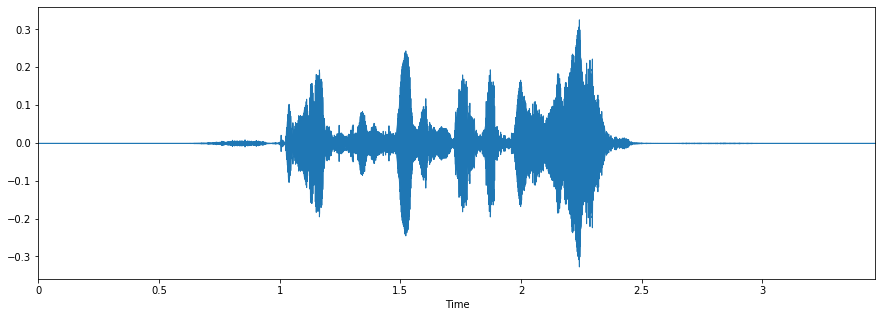

In [7]:
#picking the file with fearful emotion
fname=RAVV+'Actor_14/03-01-06-02-02-02-14.wav'
data,sampling_rate=librosa.load(fname)
plt.figure(figsize=(15,5))
librosa.display.waveplot(data,sampling_rate)

In [8]:
ipd.Audio(fname)

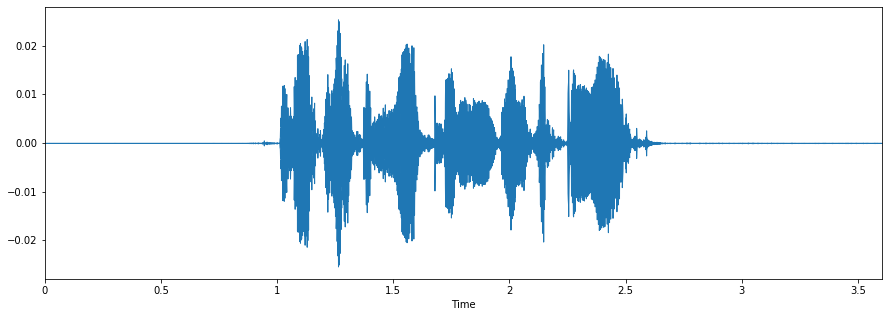

In [10]:
#picking a happy track from actor 14
fname = RAVV + 'Actor_14/03-01-04-01-01-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

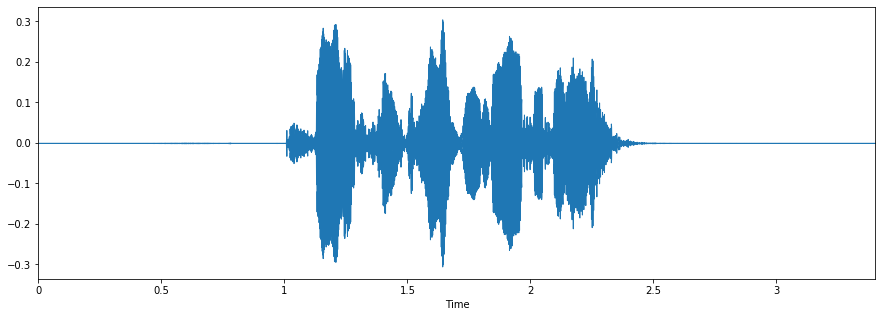

In [11]:
#picking different actors 10
#picking a surprise track 
#with high intensity

fname = RAVV + 'Actor_10/03-01-08-02-01-02-10.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

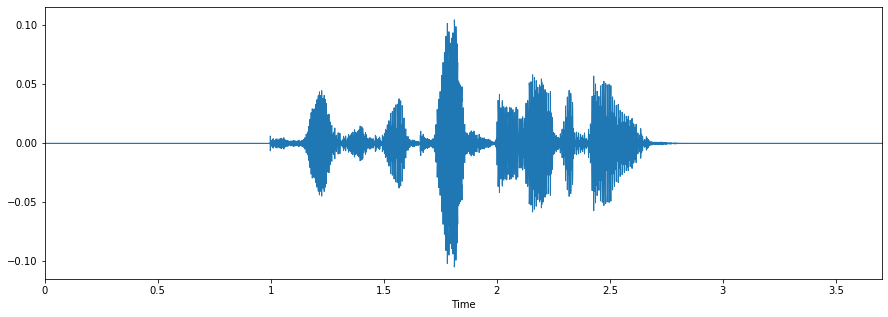

In [12]:
##picking actor 1
fname = RAVV + 'Actor_01/03-01-04-02-01-02-01.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [21]:
RAV_df

labels   source  \
0        male_neutral  RAVDESS   
1        male_neutral  RAVDESS   
2        male_neutral  RAVDESS   
3        male_neutral  RAVDESS   
4        male_neutral  RAVDESS   
...               ...      ...   
1435  female_surprise  RAVDESS   
1436  female_surprise  RAVDESS   
1437  female_surprise  RAVDESS   
1438  female_surprise  RAVDESS   
1439  female_surprise  RAVDESS   

                                                   path  
0     RAVDEES/audio_speech_actors_01-24/Actor_01/03-...  
1     RAVDEES/audio_speech_actors_01-24/Actor_01/03-...  
2     RAVDEES/audio_speech_actors_01-24/Actor_01/03-...  
3     RAVDEES/audio_speech_actors_01-24/Actor_01/03-...  
4     RAVDEES/audio_speech_actors_01-24/Actor_01/03-...  
...                                                 ...  
1435  RAVDEES/audio_speech_actors_01-24/Actor_24/03-...  
1436  RAVDEES/audio_speech_actors_01-24/Actor_24/03-...  
1437  RAVDEES/audio_speech_actors_01-24/Actor_24/03-...  
1438  RAVDEES/audio_speech_actors_01-24/Actor_24/03-...  
1439  RAVDEES/audio_speech_actors_01-24/Actor_24/03-...  

[1440 rows x 3 columns]

In [19]:
RAV_df.labels.value_counts()

female_neutral     144
male_neutral       144
female_happy        96
female_angry        96
male_fear           96
male_sad            96
male_happy          96
female_sad          96
female_disgust      96
female_fear         96
male_surprise       96
male_angry          96
female_surprise     96
male_disgust        96
Name: labels, dtype: int64

In [20]:
df=pd.concat([RAV_df],axis=0)
print(df.labels.value_counts())
df.head()
df.to_csv("DATA_PATH.csv",index=False)

female_neutral     144
male_neutral       144
female_happy        96
female_angry        96
male_fear           96
male_sad            96
male_happy          96
female_sad          96
female_disgust      96
female_fear         96
male_surprise       96
male_angry          96
female_surprise     96
male_disgust        96
Name: labels, dtype: int64


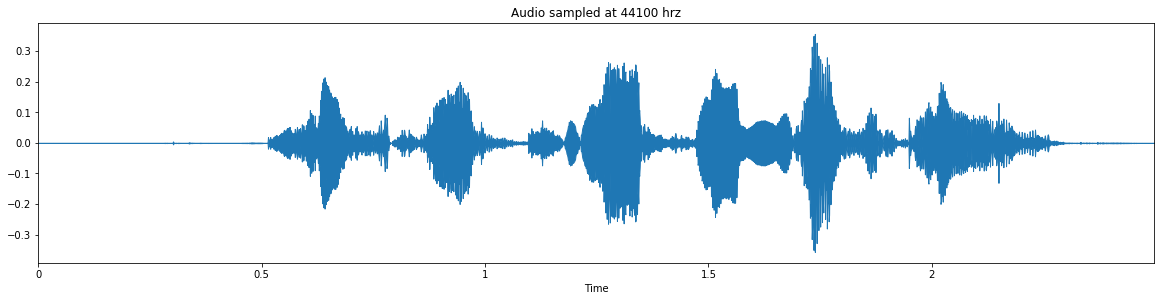

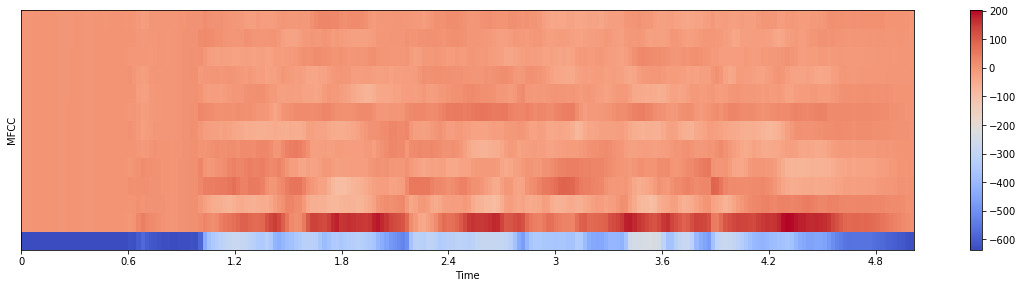

In [23]:
#displaying the different emotions using LIBROSA AND MATPLOT

path="RAVDEES/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

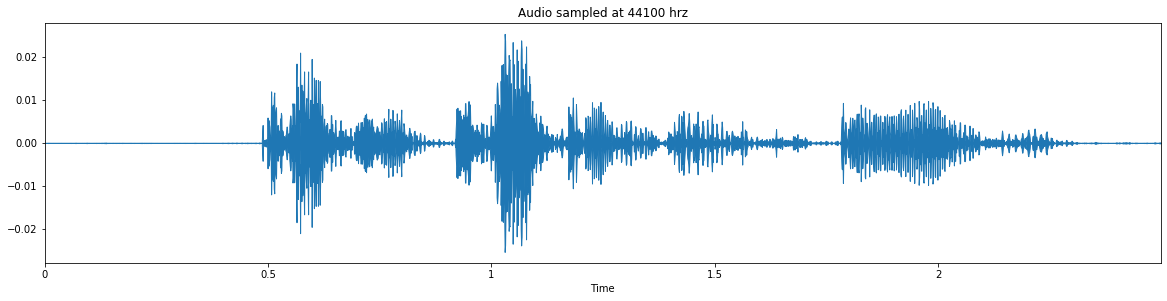

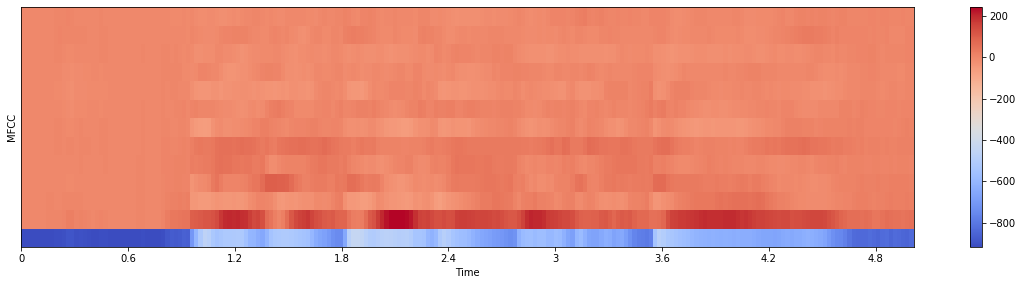

In [26]:
path = "RAVDEES/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

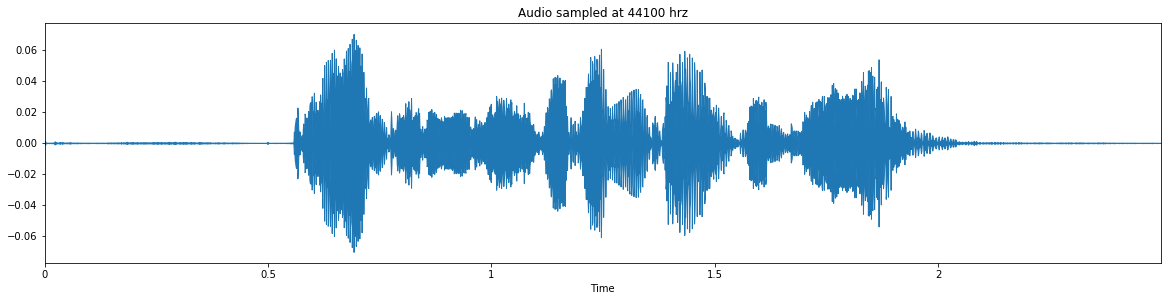

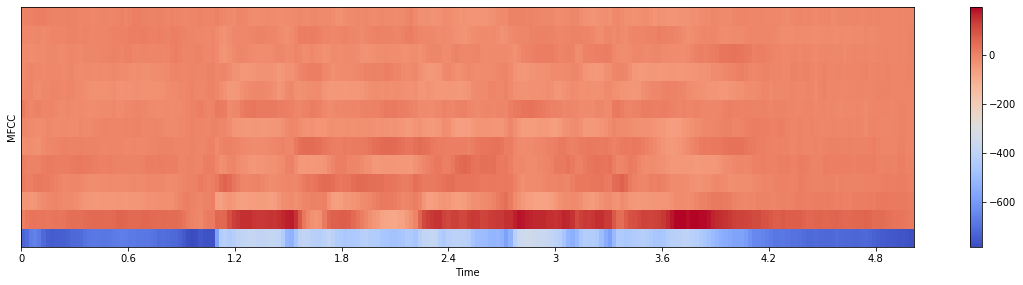

In [27]:
path = "RAVDEES/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

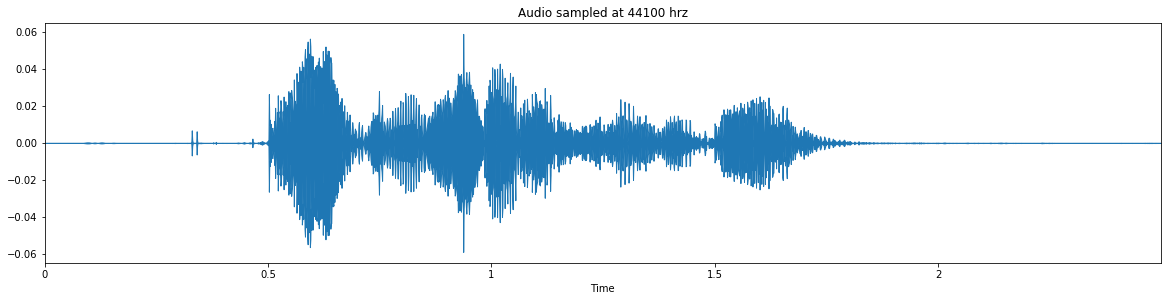

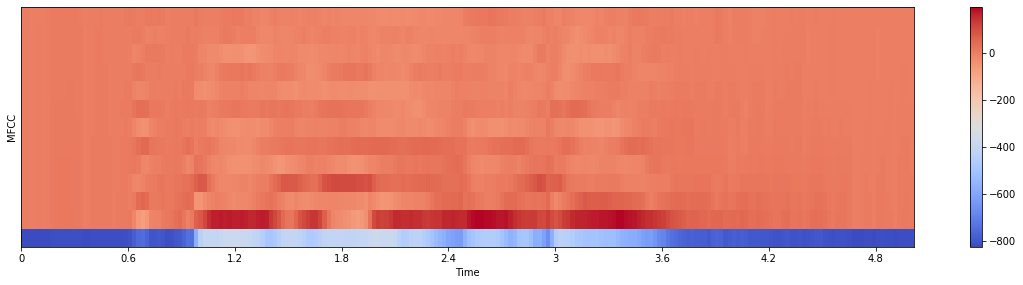

In [28]:
# Source - RAVDESS; Gender - Male; Emotion - Happy 
path = "RAVDEES/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

216
216


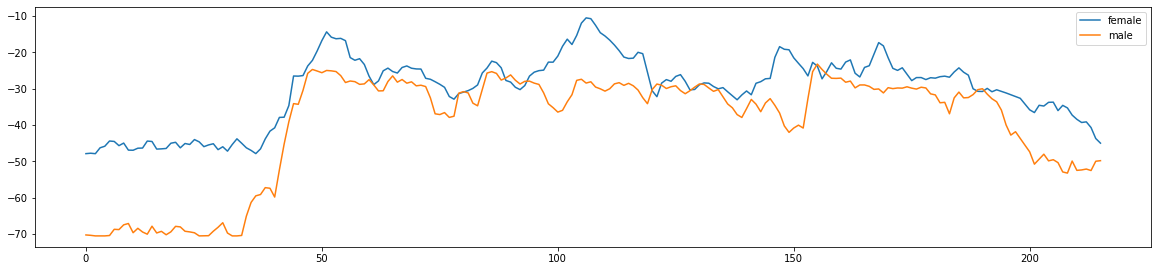

In [30]:
#compare the angry female and angry male emotion : ANGRY
path = "RAVDEES/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "RAVDEES/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


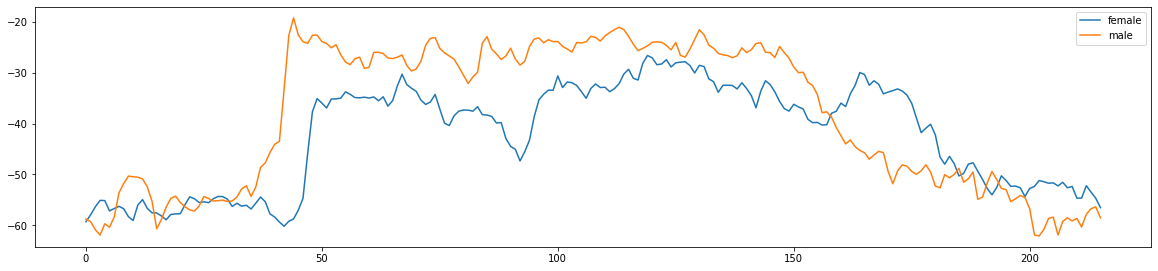

In [31]:
#as observed in the plot the female sentences tend to have higher pitch then male.
#now we willbe comparing the happy male and female
path = "RAVDEES/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy 
path = "RAVDEES/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

by seeing the given plots we  conciled that MFCC is a good feature to differentiate the gender and emotions as demonstrated above. even we are ommited alot of good informationby just taking the mean, it seems we will capture enough to be able to capture some difference

In [34]:
#importing required libraries
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

#sklearn
# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the noteboo

In [35]:
ref=pd.read_csv("DATA_PATH.csv")
ref.head()

labels   source                                               path
0  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...
1  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...
2  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...
3  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...
4  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...

In [36]:
ref.shape

(1440, 3)

In [37]:
ref[1300:]

labels   source  \
1300      female_fear  RAVDESS   
1301      female_fear  RAVDESS   
1302      female_fear  RAVDESS   
1303      female_fear  RAVDESS   
1304   female_disgust  RAVDESS   
...               ...      ...   
1435  female_surprise  RAVDESS   
1436  female_surprise  RAVDESS   
1437  female_surprise  RAVDESS   
1438  female_surprise  RAVDESS   
1439  female_surprise  RAVDESS   

                                                   path  
1300  RAVDEES/audio_speech_actors_01-24/Actor_22/03-...  
1301  RAVDEES/audio_speech_actors_01-24/Actor_22/03-...  
1302  RAVDEES/audio_speech_actors_01-24/Actor_22/03-...  
1303  RAVDEES/audio_speech_actors_01-24/Actor_22/03-...  
1304  RAVDEES/audio_speech_actors_01-24/Actor_22/03-...  
...                                                 ...  
1435  RAVDEES/audio_speech_actors_01-24/Actor_24/03-...  
1436  RAVDEES/audio_speech_actors_01-24/Actor_24/03-...  
1437  RAVDEES/audio_speech_actors_01-24/Actor_24/03-...  
1438  RAVDEES/audio_speech_actors_01-24/Actor_24/03-...  
1439  RAVDEES/audio_speech_actors_01-24/Actor_24/03-...  

[140 rows x 3 columns]

In [38]:
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

1440


feature
0  [-65.8009712673087, -65.8009712673087, -65.800...
1  [-61.84994914561038, -62.89503283066965, -63.8...
2  [-65.81886875834394, -65.81886875834394, -65.8...
3  [-66.05848538589821, -66.05848538589821, -66.0...
4  [-70.2677641610773, -70.2677641610773, -70.267...

In [43]:
print(df.shape)
print(df[0].shape)

(1440, 219)
(1440,)


In [41]:
#preprocessing data
#extracting mean bands to its own features
df=pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)

In [42]:
df[:5]

labels   source                                               path  \
0  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...   
1  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...   
2  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...   
3  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...   
4  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...   

           0          1          2          3          4          5  \
0 -65.800971 -65.800971 -65.800971 -65.800971 -65.800971 -65.800971   
1 -61.849949 -62.895033 -63.830647 -60.552590 -60.821684 -62.073396   
2 -65.818869 -65.818869 -65.818869 -65.818869 -65.805538 -65.818869   
3 -66.058485 -66.058485 -66.058485 -66.058485 -66.058485 -66.058485   
4 -70.267764 -70.267764 -70.267764 -70.267764 -70.267764 -70.267764   

           6  ...        206        207        208        209        210  \
0 -65.800971  ... -58.299903 -62.295248 -64.930130 -65.332128 -64.116934   
1 -64.889228  ... -65.389948 -65.389948 -65.389948 -65.389948 -65.389948   
2 -65.818869  ... -65.818869 -65.818869 -65.818869 -65.818869 -65.438060   
3 -66.058485  ... -57.539617 -55.826307 -57.741989 -59.796385 -60.975377   
4 -70.267764  ... -58.802037 -57.447461 -58.896493 -58.751002 -57.405669   

         211        212        213        214        215  
0 -64.319911 -64.971422 -63.155779 -64.178668 -63.061902  
1 -65.389948 -65.389948 -65.389948 -65.389948 -65.389948  
2 -65.684853 -65.818869 -65.818869 -65.818869 -65.818869  
3 -62.663056 -64.573480 -63.782612 -61.515785 -58.214885  
4 -60.078475 -63.426811 -62.638537 -61.082741 -60.234652  

[5 rows x 219 columns]

In [44]:
#replace NA VALUES with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(1440, 219)


labels   source                                               path  \
0  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...   
1  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...   
2  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...   
3  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...   
4  male_neutral  RAVDESS  RAVDEES/audio_speech_actors_01-24/Actor_01/03-...   

           0          1          2          3          4          5  \
0 -65.800971 -65.800971 -65.800971 -65.800971 -65.800971 -65.800971   
1 -61.849949 -62.895033 -63.830647 -60.552590 -60.821684 -62.073396   
2 -65.818869 -65.818869 -65.818869 -65.818869 -65.805538 -65.818869   
3 -66.058485 -66.058485 -66.058485 -66.058485 -66.058485 -66.058485   
4 -70.267764 -70.267764 -70.267764 -70.267764 -70.267764 -70.267764   

           6  ...        206        207        208        209        210  \
0 -65.800971  ... -58.299903 -62.295248 -64.930130 -65.332128 -64.116934   
1 -64.889228  ... -65.389948 -65.389948 -65.389948 -65.389948 -65.389948   
2 -65.818869  ... -65.818869 -65.818869 -65.818869 -65.818869 -65.438060   
3 -66.058485  ... -57.539617 -55.826307 -57.741989 -59.796385 -60.975377   
4 -70.267764  ... -58.802037 -57.447461 -58.896493 -58.751002 -57.405669   

         211        212        213        214        215  
0 -64.319911 -64.971422 -63.155779 -64.178668 -63.061902  
1 -65.389948 -65.389948 -65.389948 -65.389948 -65.389948  
2 -65.684853 -65.818869 -65.818869 -65.818869 -65.818869  
3 -62.663056 -64.573480 -63.782612 -61.515785 -58.214885  
4 -60.078475 -63.426811 -62.638537 -61.082741 -60.234652  

[5 rows x 219 columns]

In [45]:
#splitting the data
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )
# Lets see how the data present itself before normalisation 
X_train[150:160]

0          1          2          3          4          5    \
1050 -55.792234 -55.792234 -55.792234 -55.792234 -55.792234 -55.792234   
1089 -50.395932 -52.036786 -53.322959 -53.681832 -53.737864 -52.723579   
1272 -61.700182 -57.653722 -56.524041 -57.255065 -58.251516 -58.588045   
1029 -68.502747 -68.502747 -68.502747 -68.502747 -68.502747 -68.502747   
1336 -50.746702 -50.746702 -50.746702 -50.746702 -50.746702 -50.746702   
328  -59.399677 -59.468377 -59.668449 -59.724679 -60.086936 -59.951922   
318  -38.217409 -41.892889 -44.717843 -45.231656 -46.388265 -46.609081   
1108 -49.650129 -50.190398 -50.976834 -51.068006 -51.623965 -51.873101   
1176 -64.176734 -64.176734 -64.176734 -64.176734 -64.176734 -64.176734   
12   -63.311078 -63.072484 -63.412433 -63.796762 -63.581991 -58.921211   

            6          7          8          9    ...        206        207  \
1050 -55.792234 -55.792234 -55.792234 -55.792234  ... -55.792234 -55.132449   
1089 -51.938457 -51.223718 -52.601023 -52.437777  ... -27.819884 -28.124721   
1272 -58.263524 -59.956105 -61.131729 -61.206841  ... -42.763938 -45.648986   
1029 -68.502747 -68.502747 -68.502747 -68.502747  ... -56.981620 -59.474015   
1336 -50.746702 -50.746702 -50.746702 -50.746702  ... -50.746702 -50.746702   
328  -59.502950 -59.673491 -59.957559 -60.216085  ... -46.127409 -45.867154   
318  -46.288274 -45.191871 -45.330696 -45.295944  ... -41.689113 -42.721089   
1108 -52.943504 -53.552563 -51.887531 -51.599003  ... -43.604423 -44.173772   
1176 -64.176734 -64.176734 -64.176734 -64.176734  ... -58.868192 -58.210467   
12   -57.955046 -61.224968 -63.782931 -63.796762  ... -59.814756 -62.505021   

            208        209        210        211        212        213  \
1050 -54.455515 -54.875515 -55.792234 -55.792234 -55.792234 -55.792234   
1089 -28.800526 -28.736746 -28.625130 -29.070346 -29.151941 -29.545988   
1272 -46.544670 -47.593874 -47.936821 -50.597685 -48.966415 -47.780601   
1029 -63.432537 -64.038320 -58.799247 -57.890312 -62.155494 -68.502747   
1336 -50.746702 -50.746702 -50.746702 -50.746702 -50.746702 -50.746702   
328  -43.997778 -46.021890 -48.724929 -52.319591 -51.885935 -54.411472   
318  -43.540027 -43.351807 -43.272884 -43.244743 -44.006233 -44.455662   
1108 -44.832886 -47.194764 -45.137010 -44.643775 -46.524570 -48.391472   
1176 -60.469254 -62.210719 -62.129736 -63.643382 -64.176734 -61.997287   
12   -59.518870 -60.482347 -58.338576 -58.965295 -63.520669 -63.769352   

            214        215  
1050 -55.792234 -55.792234  
1089 -29.642235 -27.836393  
1272 -48.314788 -51.189300  
1029 -68.336714 -68.385653  
1336 -50.330837 -50.201980  
328  -58.322074 -55.230301  
318  -43.550024 -43.744912  
1108 -47.425131 -45.681588  
1176 -61.251631 -58.764049  
12   -63.829853 -62.814244  

[10 rows x 216 columns]

In [46]:
#normalisation
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

0         1         2         3         4         5         6    \
1050  0.013218 -0.015602 -0.016283 -0.018856 -0.019954 -0.025474 -0.030099   
1089  0.658126  0.437557  0.284960  0.239728  0.231617  0.349033  0.432788   
1272 -0.692837 -0.240222 -0.105561 -0.198095 -0.321109 -0.366682 -0.326932   
1029 -1.505806 -1.549341 -1.566923 -1.576258 -1.576437 -1.576698 -1.556790   
1336  0.616206  0.593228  0.599255  0.599366  0.597903  0.590296  0.575932   
328  -0.417905 -0.459191 -0.489169 -0.500694 -0.545868 -0.533133 -0.475802   
318   2.113573  1.661591  1.334756  1.275116  1.131622  1.095262  1.111445   
1108  0.747257  0.660355  0.571180  0.559997  0.490477  0.452828  0.312069   
1176 -0.988808 -1.027334 -1.039164 -1.046198 -1.046689 -1.048740 -1.037182   
12   -0.885354 -0.894088 -0.945922 -0.999640 -0.973859 -0.407342 -0.289880   

           7         8         9    ...       206       207       208  \
1050 -0.029411 -0.034569 -0.042744  ... -0.853944 -0.773095 -0.694418   
1089  0.515230  0.346749  0.357337  ...  1.588554  1.576797  1.533004   
1272 -0.525812 -0.672585 -0.688537  ...  0.283665  0.052043 -0.007581   
1029 -1.544710 -1.553349 -1.558709  ... -0.957799 -1.150847 -1.473822   
1336  0.572098  0.568322  0.559029  ... -0.413377 -0.391499 -0.372411   
328  -0.492120 -0.532284 -0.570371  ... -0.010028  0.033061  0.213546   
318   1.234323  1.215480  1.209133  ...  0.377516  0.306794  0.253288   
1108  0.237594  0.432004  0.457376  ...  0.210275  0.180399  0.141040   
1176 -1.028979 -1.036433 -1.042752  ... -1.122531 -1.040908 -1.216544   
12   -0.677081 -0.989378 -0.997433  ... -1.205184 -1.414569 -1.134029   

           209       210       211       212       213       214       215  
1050 -0.704985 -0.766947 -0.752048 -0.725764 -0.697185 -0.675555 -0.634144  
1089  1.573765  1.616338  1.604260  1.631550  1.613773  1.416442  1.391229  
1272 -0.070179 -0.077816 -0.293999 -0.121769  0.008232 -0.077360 -0.300666  
1029 -1.503788 -1.030743 -0.937055 -1.288829 -1.816334 -1.679112 -1.546525  
1336 -0.345039 -0.324318 -0.307139 -0.279301 -0.252930 -0.238644 -0.229136  
328   0.066865 -0.146954 -0.445834 -0.380108 -0.575610 -0.877942 -0.593433  
318   0.299640  0.331337  0.354376  0.317141  0.300990  0.303821  0.238673  
1108 -0.035385  0.167803  0.231011  0.094302 -0.045555 -0.006188  0.098362  
1176 -1.344460 -1.322916 -1.444354 -1.467682 -1.243534 -1.112306 -0.849449  
12   -1.193782 -0.990329 -1.031846 -1.409629 -1.399563 -1.318564 -1.142882  

[10 rows x 216 columns]

In [47]:
 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(1080, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [48]:
#1DCNN

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(1080, 216, 1)

In [49]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          2304      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_2 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 256)          

In [50]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Train on 1080 samples, validate on 360 samples
Epoch 1/100
1080/1080 [==============================] - 22s 21ms/step - loss: 2.5957 - accuracy: 0.0935 - val_loss: 2.6441 - val_accuracy: 0.0389
Epoch 2/100
1080/1080 [==============================] - 23s 21ms/step - loss: 2.4516 - accuracy: 0.2056 - val_loss: 2.6465 - val_accuracy: 0.0389
Epoch 3/100
1080/1080 [==============================] - 23s 21ms/step - loss: 2.3675 - accuracy: 0.2500 - val_loss: 2.6457 - val_accuracy: 0.0389
Epoch 4/100
1080/1080 [==============================] - 23s 21ms/step - loss: 2.2869 - accuracy: 0.2963 - val_loss: 2.6382 - val_accuracy: 0.0472
Epoch 5/100
1080/1080 [==============================] - 23s 21ms/step - loss: 2.2222 - accuracy: 0.3148 - val_loss: 2.6186 - val_accuracy: 0.1111
Epoch 6/100
1080/1080 [==============================] - 24s 22ms/step - loss: 2.1762 - accuracy: 0.3481 - val_loss: 2.5790 - val_accuracy: 0.1778
Epoch 7/100
1080/1080 [==============================] - 23s 21ms/step 

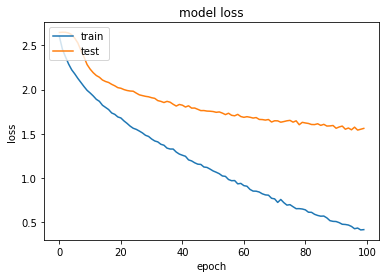

In [51]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at C:\Users\hardi\Speech sentiment analysis\saved_models\Emotion_Model.h5 


In [55]:
#loading json architecture and model architecture
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 43.61%


In [56]:
preds = loaded_model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

360/360 [==============================] - 2s 4ms/step


array([ 8,  7,  4,  4,  7, 11,  4,  5,  3, 11,  0,  6, 11,  6,  4,  1,  0,
        9,  3,  5,  6,  4,  4, 11,  5, 11,  9, 10,  1, 11, 11,  0,  7,  7,
       11, 11,  1,  7,  5, 10,  4, 11,  5,  7, 10, 11,  4, 13,  1,  3, 12,
        3, 13,  0,  5,  1,  4,  4, 10, 13, 11,  1, 13,  6,  5,  6,  5, 11,
        3, 11,  6,  5,  4,  5, 11, 11,  7,  6, 11,  1, 10,  0,  6,  4,  5,
        7,  2,  1, 11,  3,  4,  4,  1, 10,  3,  8, 10,  9,  3,  7, 11,  2,
       10, 10,  9,  6,  4,  1,  9, 11,  6,  0,  3,  4,  1,  6,  0, 10, 11,
        9,  5,  4,  5,  9, 10,  7,  6, 11,  3,  2, 10,  8, 10,  9,  5,  4,
        4, 11,  5,  0,  7,  1,  0, 10,  0, 10,  7, 11,  9,  2,  9,  5,  4,
       10,  2, 11,  3, 11, 13,  2, 11, 11,  7,  4,  3,  4,  7,  5,  5,  6,
        4,  9,  0,  5,  7,  4,  7, 10, 10,  5,  0,  3,  3,  9,  4, 11,  4,
        9,  0,  1, 11,  5,  4,  4,  4,  5, 10,  6,  4,  4,  4, 11,  9,  5,
       11,  1, 11,  4, 10, 10,  4, 11,  6,  5,  4, 12,  0,  8,  3,  9,  5,
       10,  5,  5, 11,  4

In [57]:
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

actualvalues predictedvalues
170  female_neutral  female_neutral
171       male_fear       male_fear
172    female_angry    female_angry
173  female_disgust      female_sad
174       male_fear      male_angry
175  female_neutral  female_neutral
176      male_angry      male_angry
177   male_surprise      male_happy
178      male_happy      male_happy
179      female_sad      female_sad

In [58]:
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues              
female_angry               23
female_disgust             21
female_fear                10
female_happy               23
female_neutral             50
female_sad                 46
female_surprise            25
male_angry                 26
male_disgust                9
male_fear                  18
male_happy                 36
male_neutral               62
male_sad                    4
male_surprise               7

In [60]:
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.39      0.38      0.38        24
 female_disgust       0.33      0.26      0.29        27
    female_fear       0.60      0.24      0.34        25
   female_happy       0.26      0.26      0.26        23
 female_neutral       0.52      0.62      0.57        42
     female_sad       0.22      0.56      0.31        18
female_surprise       0.76      0.61      0.68        31
     male_angry       0.65      0.65      0.65        26
   male_disgust       0.56      0.26      0.36        19
      male_fear       0.39      0.50      0.44        14
     male_happy       0.31      0.58      0.40        19
   male_neutral       0.47      0.81      0.59        36
       male_sad       0.50      0.06      0.11        32
  male_surprise       0.43      0.12      0.19        24

       accuracy                           0.44       360
      macro avg       0.46      0.42      0.40       360
   weighted avg       0.47   

In [62]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))

0.9277777777777778


In [63]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))


              precision    recall  f1-score   support

      female       0.91      0.95      0.93       190
        male       0.94      0.90      0.92       170

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360



In [65]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))

0.4638888888888889


In [66]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.61      0.60      0.61        50
     disgust       0.50      0.33      0.39        46
        fear       0.50      0.36      0.42        39
       happy       0.29      0.40      0.34        42
     neutral       0.51      0.73      0.60        78
         sad       0.24      0.24      0.24        50
    surprise       0.69      0.40      0.51        55

    accuracy                           0.46       360
   macro avg       0.48      0.44      0.44       360
weighted avg       0.49      0.46      0.46       360



# conclusion
from the model and the data provided to us we can see that the model accuracy to detect the emotion is around 50% and the emotion like angry and surprise is good out of all the other possible data. 

in our model we can also discriminate between the gender with an weighted average of 93% which is good.